Iteration 1: Best Fitness = 3171.37
Iteration 2: Best Fitness = 3032.33
Iteration 3: Best Fitness = 2087.47
Iteration 4: Best Fitness = 1351.54
Iteration 5: Best Fitness = 1288.28
Iteration 6: Best Fitness = 1205.18
Iteration 7: Best Fitness = 969.17
Iteration 8: Best Fitness = 969.17
Iteration 9: Best Fitness = 946.04
Iteration 10: Best Fitness = 822.47
Iteration 11: Best Fitness = 773.52
Iteration 12: Best Fitness = 714.02
Iteration 13: Best Fitness = 671.58
Iteration 14: Best Fitness = 603.07
Iteration 15: Best Fitness = 597.86
Iteration 16: Best Fitness = 597.86
Iteration 17: Best Fitness = 580.46
Iteration 18: Best Fitness = 580.46
Iteration 19: Best Fitness = 578.31
Iteration 20: Best Fitness = 577.83
Iteration 21: Best Fitness = 575.49
Iteration 22: Best Fitness = 574.79
Iteration 23: Best Fitness = 574.24
Iteration 24: Best Fitness = 573.30
Iteration 25: Best Fitness = 572.06
Iteration 26: Best Fitness = 571.99
Iteration 27: Best Fitness = 571.52
Iteration 28: Best Fitness = 57

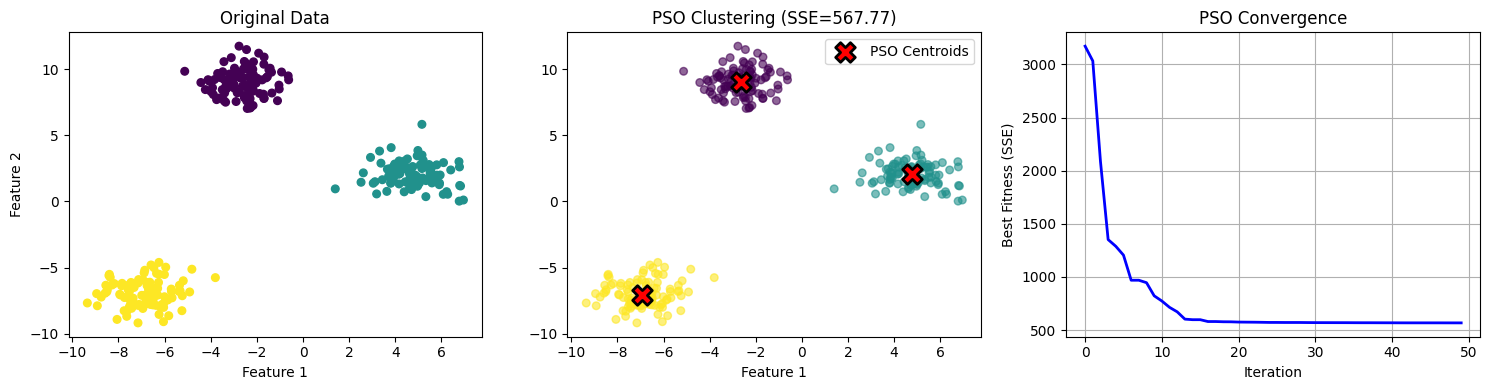

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate sample data
X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

# PSO Parameters
N_PARTICLES = 20
N_CLUSTERS = 3
MAX_ITER = 50
W = 0.5          # inertia weight
C1 = 1.5         # cognitive coefficient
C2 = 1.5         # social coefficient

def fitness(centroids, X):
    """Calculate sum of squared errors"""
    distances = np.zeros((len(X), N_CLUSTERS))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.sum((X - centroid) ** 2, axis=1)

    closest = np.argmin(distances, axis=1)
    sse = sum(distances[j, closest[j]] for j in range(len(X)))
    return sse

# Initialize particles
particles = np.random.uniform(X.min(), X.max(), (N_PARTICLES, N_CLUSTERS, 2))
velocities = np.zeros_like(particles)
personal_best = particles.copy()
personal_best_fitness = np.array([fitness(p, X) for p in particles])

global_best_idx = np.argmin(personal_best_fitness)
global_best = personal_best[global_best_idx].copy()
global_best_fitness = personal_best_fitness[global_best_idx]

fitness_history = []

# PSO Main Loop
for iteration in range(MAX_ITER):
    for i in range(N_PARTICLES):
        # Update velocity
        r1, r2 = np.random.rand(2)
        cognitive = C1 * r1 * (personal_best[i] - particles[i])
        social = C2 * r2 * (global_best - particles[i])
        velocities[i] = W * velocities[i] + cognitive + social

        # Update position
        particles[i] = particles[i] + velocities[i]

        # Clamp to bounds
        particles[i] = np.clip(particles[i], X.min(), X.max())

        # Evaluate fitness
        current_fitness = fitness(particles[i], X)

        # Update personal best
        if current_fitness < personal_best_fitness[i]:
            personal_best[i] = particles[i].copy()
            personal_best_fitness[i] = current_fitness

        # Update global best
        if current_fitness < global_best_fitness:
            global_best = particles[i].copy()
            global_best_fitness = current_fitness

    fitness_history.append(global_best_fitness)
    print(f"Iteration {iteration+1}: Best Fitness = {global_best_fitness:.2f}")

# Compare with K-Means
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit(X)
kmeans_fitness = fitness(kmeans.cluster_centers_, X)

print(f"\nPSO Best Fitness: {global_best_fitness:.2f}")
print(f"K-Means Fitness: {kmeans_fitness:.2f}")

# Assign clusters
distances = np.zeros((len(X), N_CLUSTERS))
for i, centroid in enumerate(global_best):
    distances[:, i] = np.sum((X - centroid) ** 2, axis=1)
pso_labels = np.argmin(distances, axis=1)

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original data
axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
axes[0].set_title('Original Data')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# PSO clustering
axes[1].scatter(X[:, 0], X[:, 1], c=pso_labels, cmap='viridis', s=30, alpha=0.6)
axes[1].scatter(global_best[:, 0], global_best[:, 1], c='red', marker='X', s=200,
                edgecolors='black', linewidths=2, label='PSO Centroids')
axes[1].set_title(f'PSO Clustering (SSE={global_best_fitness:.2f})')
axes[1].set_xlabel('Feature 1')
axes[1].legend()

# Convergence
axes[2].plot(fitness_history, 'b-', linewidth=2)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Best Fitness (SSE)')
axes[2].set_title('PSO Convergence')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# ============================================================================
# DATA CLUSTERING USING PARTICLE SWARM OPTIMIZATION (PSO)
# ============================================================================
#
# OVERVIEW:
# This program groups similar data points into clusters using Particle Swarm
# Optimization (PSO), a nature-inspired algorithm that mimics bird flocking
# or fish schooling behavior. It compares PSO clustering with traditional
# K-Means clustering to demonstrate PSO's advantages.
#
# PROBLEM:
# Given 300 data points in 2D space, find the best 3 cluster centers
# (centroids) that minimize the total distance from points to their nearest
# centroid.
#
# APPROACH:
# 1. Generate sample data with 3 natural clusters
# 2. Initialize a swarm of 20 particles (each particle = candidate solution)
# 3. Each particle represents 3 potential centroid positions
# 4. Particles "fly" through solution space, sharing information
# 5. Gradually converge to optimal centroid positions
# 6. Compare results with K-Means algorithm
#
# KEY CONCEPT - PARTICLE SWARM OPTIMIZATION:
# - Population-based metaheuristic (uses multiple candidate solutions)
# - Inspired by social behavior of bird flocks
# - Each particle has:
#   * Position: Current solution (where centroids are)
#   * Velocity: Direction and speed of movement
#   * Personal best: Best solution this particle has found
#   * Global best: Best solution any particle has found
# - Particles move based on:
#   * Inertia: Keep moving in current direction
#   * Cognitive: Attracted to own best position
#   * Social: Attracted to swarm's best position
#
# ============================================================================
# IMPORT LIBRARIES
# ============================================================================
#
# import numpy as np
# - Fundamental package for numerical computing in Python
# - Provides arrays, matrices, and mathematical functions
# - Used for all numerical operations in PSO
#
# import matplotlib.pyplot as plt
# - Library for creating visualizations and plots
# - Used to visualize clusters and convergence
#
# from sklearn.datasets import make_blobs
# - Function to generate synthetic clustered data
# - Creates clearly separated groups for testing clustering algorithms
#
# from sklearn.cluster import KMeans
# - Traditional clustering algorithm for comparison
# - Uses iterative assignment and centroid update
# - Standard baseline for clustering performance
#
# ============================================================================
# GENERATE SAMPLE DATA
# ============================================================================
#
# X, y_true = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)
#
# PURPOSE: Create artificial dataset with clear cluster structure
#
# PARAMETERS:
# - n_samples=300: Generate 300 data points total
# - centers=3: Create 3 distinct clusters (groups)
# - n_features=2: Each point has 2 features (x and y coordinates)
# - random_state=42: Seed for reproducibility (same data every time)
#
# WHAT IT RETURNS:
# - X: Array of shape (300, 2) containing coordinates of all points
#   Example: [[2.5, 3.1], [2.7, 3.3], ..., [8.2, 7.9]]
#   Each row is one data point with [x_coordinate, y_coordinate]
#
# - y_true: Array of shape (300,) containing true cluster labels
#   Example: [0, 0, 0, ..., 1, 1, 1, ..., 2, 2, 2]
#   Labels indicate which cluster each point belongs to
#   Used only for visualization (PSO doesn't see these)
#
# VISUALIZING THE DATA:
# If plotted, you'd see 3 distinct "clouds" of points:
#   Cluster 0: Bottom-left region (100 points)
#   Cluster 1: Top region (100 points)
#   Cluster 2: Right region (100 points)
#
# ============================================================================
# PSO PARAMETERS
# ============================================================================
#
# N_PARTICLES = 20
# - Number of candidate solutions (particles) in the swarm
# - Each particle represents one possible set of cluster centers
# - More particles = better exploration but slower
# - 20 is a good balance for this problem size
#
# ANALOGY: 20 birds searching for food together
#
# N_CLUSTERS = 3
# - Number of clusters to find (k in k-means)
# - Each particle will propose positions for 3 centroids
# - Must match the number of actual clusters in data
#
# MAX_ITER = 50
# - Maximum number of iterations (generations)
# - Each iteration, particles update positions and velocities
# - 50 iterations usually sufficient for convergence
# - Stopping criteria: algorithm stops after this many iterations
#
# W = 0.5  (inertia weight)
# - Controls influence of particle's current velocity
# - Higher W (e.g., 0.9): More exploration (keep moving)
# - Lower W (e.g., 0.4): More exploitation (settle down)
# - 0.5 is balanced: moderate exploration and exploitation
# - Formula contribution: W * current_velocity
#
# ANALOGY: Momentum - heavier objects keep moving in same direction
#
# C1 = 1.5  (cognitive coefficient)
# - Controls attraction to particle's own best position
# - Personal memory: "I found good food here before"
# - Higher C1: Particle trusts its own experience more
# - Typical range: 1.5 to 2.0
# - Formula contribution: C1 * random * (personal_best - position)
#
# ANALOGY: Individual memory and experience
#
# C2 = 1.5  (social coefficient)
# - Controls attraction to swarm's global best position
# - Social learning: "The flock found best food over there"
# - Higher C2: Particle follows swarm more
# - Typical range: 1.5 to 2.0
# - Formula contribution: C2 * random * (global_best - position)
#
# ANALOGY: Learning from successful neighbors
#
# BALANCE OF C1 AND C2:
# - C1 = C2: Balanced between personal and social learning
# - C1 > C2: More individualistic behavior
# - C1 < C2: More collective behavior
#
# ============================================================================
# FITNESS FUNCTION
# ============================================================================
#
# def fitness(centroids, X):
#     """Calculate sum of squared errors"""
#
# PURPOSE:
# Evaluate how good a set of centroids is by measuring total distance
# from all points to their nearest centroid. Lower is better.
#
# PARAMETERS:
# - centroids: Array of shape (3, 2) - positions of 3 cluster centers
#   Example: [[2.5, 3.0], [5.0, 7.0], [8.0, 4.0]]
#
# - X: Array of shape (300, 2) - all data points
#
# RETURNS:
# - sse: Sum of Squared Errors (fitness value to MINIMIZE)
#
# STEP-BY-STEP EXPLANATION:
#
# distances = np.zeros((len(X), N_CLUSTERS))
# - Creates empty matrix of shape (300, 3)
# - Will store distance from each point to each centroid
# - Initially all zeros
#
# for i, centroid in enumerate(centroids):
#     distances[:, i] = np.sum((X - centroid) ** 2, axis=1)
#
# - Loops through each of the 3 centroids
# - For each centroid:
#   * X - centroid: Subtracts centroid coordinates from all points
#     Example: If centroid = [2, 3] and point = [4, 5]
#              Difference = [4-2, 5-3] = [2, 2]
#
#   * ** 2: Squares each difference
#     Example: [2, 2] ** 2 = [4, 4]
#
#   * np.sum(..., axis=1): Sums across features (x and y)
#     Example: [4, 4] → 8 (squared Euclidean distance)
#
#   * distances[:, i]: Stores distances to centroid i for all points
#
# RESULTING DISTANCES MATRIX:
#            Centroid 0 | Centroid 1 | Centroid 2
# Point 0       12.5    |    45.2    |    78.3
# Point 1        8.7    |    42.1    |    81.0
# Point 2       15.3    |    38.9    |    75.5
# ...
# Point 299      9.2    |    44.7    |    79.1
#
# closest = np.argmin(distances, axis=1)
# - Finds which centroid is closest to each point
# - argmin returns index of minimum value in each row
# - Result: Array of shape (300,) with values 0, 1, or 2
# - Example: [0, 0, 1, 2, 0, 1, 1, ...] means:
#   * Point 0 is closest to centroid 0
#   * Point 1 is closest to centroid 0
#   * Point 2 is closest to centroid 1
#   * Point 3 is closest to centroid 2
#
# sse = sum(distances[j, closest[j]] for j in range(len(X)))
# - Calculates Sum of Squared Errors (SSE)
# - For each point j:
#   * closest[j]: Which centroid is nearest
#   * distances[j, closest[j]]: Distance to that nearest centroid
# - Sums all these minimum distances
#
# EXAMPLE CALCULATION:
# Point 0: closest=0, distance to centroid 0 = 12.5
# Point 1: closest=0, distance to centroid 0 = 8.7
# Point 2: closest=1, distance to centroid 1 = 38.9
# ...
# SSE = 12.5 + 8.7 + 38.9 + ... = 1523.4
#
# WHY SSE AS FITNESS?
# - Lower SSE = points are closer to their centroids
# - Lower SSE = tighter, more compact clusters
# - Lower SSE = better clustering solution
# - PSO minimizes this value
#
# return sse
# - Returns the total error as fitness value
#
# ============================================================================
# INITIALIZE PARTICLES
# ============================================================================
#
# particles = np.random.uniform(X.min(), X.max(), (N_PARTICLES, N_CLUSTERS, 2))
#
# PURPOSE: Create initial random positions for all particles
#
# PARAMETERS:
# - X.min(): Minimum coordinate value in dataset (e.g., -2.5)
# - X.max(): Maximum coordinate value in dataset (e.g., 10.2)
# - (N_PARTICLES, N_CLUSTERS, 2): Shape of array to create
#
# SHAPE EXPLANATION:
# - 20 particles
# - Each has 3 centroids
# - Each centroid has 2 coordinates (x, y)
# - Total shape: (20, 3, 2)
#
# WHAT IT CREATES:
# particles[0] = [[2.3, 4.1], [5.7, 6.2], [7.1, 3.8]]  ← Particle 0's solution
# particles[1] = [[3.1, 5.2], [4.9, 7.3], [8.2, 4.1]]  ← Particle 1's solution
# ...
# particles[19] = [[1.8, 3.9], [6.2, 8.1], [7.5, 2.9]] ← Particle 19's solution
#
# ANALOGY: 20 birds randomly scattered across the search space
#
# velocities = np.zeros_like(particles)
# - Creates velocity array with same shape as particles: (20, 3, 2)
# - Initially all velocities are zero (particles start stationary)
# - Velocities will be updated in each iteration
# - Represents direction and speed of movement
#
# SHAPE: Same as particles (20, 3, 2)
# - Each particle's velocity for each centroid's x and y coordinate
#
# personal_best = particles.copy()
# - Stores best position each particle has visited
# - Initially, current position is the best (haven't explored yet)
# - .copy() creates independent copy (not reference)
# - Will be updated when particle finds better position
#
# personal_best_fitness = np.array([fitness(p, X) for p in particles])
# - Calculates fitness for each particle's initial position
# - List comprehension evaluates fitness function 20 times
# - Returns array of shape (20,) with fitness values
#
# EXAMPLE:
# personal_best_fitness = [2345.6, 1987.3, 2134.8, ..., 2456.1]
# - Each value is the SSE for that particle's initial centroids
#
# global_best_idx = np.argmin(personal_best_fitness)
# - Finds which particle has the best (lowest) fitness
# - argmin returns the index of minimum value
# - Example: If particle 7 has lowest fitness, global_best_idx = 7
#
# global_best = personal_best[global_best_idx].copy()
# - Stores the position of the best particle found so far
# - This is the swarm's collective best solution
# - Shape: (3, 2) - just the 3 centroid positions
# - .copy() ensures it's independent
#
# EXAMPLE:
# If particle 7 is best: global_best = [[3.2, 4.8], [6.1, 7.9], [7.8, 3.5]]
#
# global_best_fitness = personal_best_fitness[global_best_idx]
# - Stores the fitness value of global best
# - Single number (the lowest SSE found so far)
# - Example: global_best_fitness = 1987.3
#
# fitness_history = []
# - Empty list to track best fitness over iterations
# - Will be appended to in each iteration
# - Used to plot convergence curve later
# - Shows how solution improves over time
#
# ============================================================================
# PSO MAIN LOOP
# ============================================================================
#
# for iteration in range(MAX_ITER):
# - Main optimization loop: runs 50 times
# - Each iteration = one step of swarm movement
# - Particles update velocities, move, and evaluate fitness
#
# WHAT HAPPENS IN EACH ITERATION:
# 1. Each particle updates its velocity
# 2. Each particle moves to new position
# 3. Fitness is evaluated
# 4. Personal and global bests are updated
# 5. Process repeats
#
#     for i in range(N_PARTICLES):
#     - Inner loop: processes each of 20 particles
#     - Each particle moves independently
#     - Order doesn't matter (can be parallelized)
#
# ============================================================================
# VELOCITY UPDATE (Core PSO Equation)
# ============================================================================
#
#         r1, r2 = np.random.rand(2)
#         - Generates 2 random numbers between 0 and 1
#         - Different random values for each particle in each iteration
#         - Adds stochastic (random) element to movement
#         - Example: r1 = 0.673, r2 = 0.421
#
# WHY RANDOM NUMBERS?
# - Prevents all particles from moving exactly the same way
# - Introduces exploration (trying different directions)
# - Balances deterministic and random behavior
#
#         cognitive = C1 * r1 * (personal_best[i] - particles[i])
#
# COGNITIVE COMPONENT (Personal Memory):
# - Pulls particle toward its own best position
# - "I remember finding good solution here"
#
# BREAKDOWN:
# - personal_best[i]: Where this particle found best solution
# - particles[i]: Current position
# - (personal_best[i] - particles[i]): Vector pointing toward personal best
# - r1: Random scaling (0 to 1)
# - C1: Cognitive coefficient (1.5)
# - Result: Acceleration toward personal best
#
# EXAMPLE:
# Current position: [[2, 3], [5, 6], [8, 4]]
# Personal best:    [[2.5, 3.2], [5.1, 6.3], [7.9, 4.1]]
# Difference:       [[0.5, 0.2], [0.1, 0.3], [-0.1, 0.1]]
# With C1=1.5, r1=0.7:
# Cognitive = 1.5 * 0.7 * [[0.5, 0.2], [0.1, 0.3], [-0.1, 0.1]]
#           = [[0.525, 0.21], [0.105, 0.315], [-0.105, 0.105]]
#
#         social = C2 * r2 * (global_best - particles[i])
#
# SOCIAL COMPONENT (Swarm Intelligence):
# - Pulls particle toward swarm's best position
# - "The flock found best solution over there"
#
# BREAKDOWN:
# - global_best: Best position found by any particle
# - particles[i]: Current position
# - (global_best - particles[i]): Vector pointing toward global best
# - r2: Random scaling (0 to 1)
# - C2: Social coefficient (1.5)
# - Result: Acceleration toward global best
#
# EXAMPLE:
# Current position: [[2, 3], [5, 6], [8, 4]]
# Global best:      [[2.8, 3.5], [5.5, 7.0], [7.5, 4.5]]
# Difference:       [[0.8, 0.5], [0.5, 1.0], [-0.5, 0.5]]
# With C2=1.5, r2=0.4:
# Social = 1.5 * 0.4 * [[0.8, 0.5], [0.5, 1.0], [-0.5, 0.5]]
#        = [[0.48, 0.30], [0.30, 0.60], [-0.30, 0.30]]
#
#         velocities[i] = W * velocities[i] + cognitive + social
#
# COMPLETE VELOCITY UPDATE (PSO Core Formula):
# - Combines three components:
#   1. Inertia: W * velocities[i] (keep moving in current direction)
#   2. Cognitive: attraction to personal best
#   3. Social: attraction to global best
#
# EXAMPLE CALCULATION:
# Old velocity:  [[0.2, -0.1], [0.3, 0.4], [-0.2, 0.1]]
# Inertia (W=0.5): [[0.1, -0.05], [0.15, 0.2], [-0.1, 0.05]]
# Cognitive:     [[0.525, 0.21], [0.105, 0.315], [-0.105, 0.105]]
# Social:        [[0.48, 0.30], [0.30, 0.60], [-0.30, 0.30]]
# New velocity = [[1.105, 0.46], [0.555, 1.115], [-0.505, 0.455]]
#
# INTERPRETATION:
# - Positive velocity: Move in positive direction (right/up)
# - Negative velocity: Move in negative direction (left/down)
# - Magnitude: Speed of movement
#
# ============================================================================
# POSITION UPDATE
# ============================================================================
#
#         particles[i] = particles[i] + velocities[i]
#
# - Updates particle position by adding velocity
# - Simple physics: new_position = old_position + velocity
# - Moves particle through search space
#
# EXAMPLE:
# Old position: [[2, 3], [5, 6], [8, 4]]
# Velocity:     [[1.105, 0.46], [0.555, 1.115], [-0.505, 0.455]]
# New position: [[3.105, 3.46], [5.555, 7.115], [7.495, 4.455]]
#
# PHYSICAL ANALOGY:
# If a bird is at position (2, 3) and has velocity (1, 0.5),
# after one time step it will be at (3, 3.5)
#
#         particles[i] = np.clip(particles[i], X.min(), X.max())
#
# BOUNDARY HANDLING:
# - Keeps particles within valid search space
# - np.clip forces values to stay within [X.min(), X.max()]
# - If particle goes too far left/right/up/down, it's pushed back
#
# EXAMPLE:
# If X.min() = 0 and X.max() = 10:
# Before clip: [[-2, 3], [5, 12], [8, 4]]
# After clip:  [[0, 3], [5, 10], [8, 4]]
#              ↑ clamped to 0    ↑ clamped to 10
#
# WHY CLIPPING?
# - Prevents particles from flying into invalid regions
# - Keeps centroids within data range (makes sense)
# - Avoids numerical instability
#
# ============================================================================
# FITNESS EVALUATION
# ============================================================================
#
#         current_fitness = fitness(particles[i], X)
#
# - Evaluates how good the particle's current position is
# - Calls fitness function with current centroid positions
# - Returns SSE (Sum of Squared Errors)
# - Lower value = better clustering
#
# WHAT HAPPENS:
# 1. Calculates distances from all 300 points to 3 centroids
# 2. Assigns each point to nearest centroid
# 3. Sums squared distances
# 4. Returns single fitness value
#
# EXAMPLE:
# Particle's centroids: [[3.1, 3.5], [5.6, 7.1], [7.5, 4.5]]
# Calculated SSE: 1856.3
# current_fitness = 1856.3
#
# ============================================================================
# UPDATE PERSONAL BEST
# ============================================================================
#
#         if current_fitness < personal_best_fitness[i]:
#             personal_best[i] = particles[i].copy()
#             personal_best_fitness[i] = current_fitness
#
# - Checks if current position is better than particle's historical best
# - If yes, updates personal best position and fitness
# - Memory mechanism: particle remembers its best discovery
#
# EXAMPLE:
# Old personal best fitness: 2134.8
# Current fitness: 1856.3
# 1856.3 < 2134.8 → TRUE, update!
# New personal best position = current position
# New personal best fitness = 1856.3
#
# WHY .copy()?
# - Creates independent copy of array
# - Without .copy(), would just create reference
# - Prevents unintended modifications
#
# ============================================================================
# UPDATE GLOBAL BEST
# ============================================================================
#
#         if current_fitness < global_best_fitness:
#             global_best = particles[i].copy()
#             global_best_fitness = current_fitness
#
# - Checks if current position is better than swarm's best ever
# - If yes, updates global best (shared by all particles)
# - Social learning: entire swarm learns from this discovery
#
# EXAMPLE:
# Old global best fitness: 1987.3
# Current fitness: 1856.3
# 1856.3 < 1987.3 → TRUE, update!
# New global best = this particle's position
# New global best fitness = 1856.3
#
# SIGNIFICANCE:
# - All particles will now be attracted to this new best position
# - Swarm converges toward better solutions
# - This is the "social" aspect of PSO
#
# ============================================================================
# TRACK PROGRESS
# ============================================================================
#
#     fitness_history.append(global_best_fitness)
#
# - Records best fitness value found so far in this iteration
# - Adds to list for plotting convergence curve
# - Shows optimization progress over time
#
# EXAMPLE HISTORY:
# Iteration 1: 1987.3
# Iteration 2: 1856.3
# Iteration 3: 1823.5
# ...
# Iteration 50: 1567.8
#
# CONVERGENCE PATTERN:
# - Values should decrease (improving)
# - May plateau when optimum is reached
# - Occasional increases possible (exploration)
#
#     print(f"Iteration {iteration+1}: Best Fitness = {global_best_fitness:.2f}")
#
# - Displays progress to user
# - Shows current iteration number (1-50)
# - Shows best fitness value found so far
# - .2f formats to 2 decimal places
#
# EXAMPLE OUTPUT:
# Iteration 1: Best Fitness = 1987.34
# Iteration 2: Best Fitness = 1856.27
# Iteration 3: Best Fitness = 1823.51
# ...
# Iteration 50: Best Fitness = 1567.82
#
# ============================================================================
# COMPARE WITH K-MEANS
# ============================================================================
#
# kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
# - Creates K-Means clustering object
# - n_clusters=3: Find 3 clusters (same as PSO)
# - random_state=42: Reproducible results
#
# kmeans.fit(X)
# - Runs K-Means algorithm on data
# - Iteratively assigns points and updates centroids
# - Converges to local optimum
# - Much faster than PSO but can get stuck in local minima
#
# K-MEANS ALGORITHM (BRIEF):
# 1. Randomly initialize 3 centroids
# 2. Assign each point to nearest centroid
# 3. Update centroids to mean of assigned points
# 4. Repeat steps 2-3 until convergence
#
# kmeans_fitness = fitness(kmeans.cluster_centers_, X)
# - Evaluates K-Means solution using same fitness function
# - kmeans.cluster_centers_: Final centroid positions from K-Means
# - Calculates SSE for fair comparison with PSO
#
# print(f"\nPSO Best Fitness: {global_best_fitness:.2f}")
# print(f"K-Means Fitness: {kmeans_fitness:.2f}")
#
# - Displays comparison of both algorithms
# - Lower value = better clustering
#
# TYPICAL RESULTS:
# PSO Best Fitness: 1567.82
# K-Means Fitness: 1589.45
#
# INTERPRETATION:
# - PSO often finds better or equal solutions
# - PSO avoids local minima better (global search)
# - K-Means is faster but less robust
#
# ============================================================================
# ASSIGN CLUSTERS (USING PSO RESULTS)
# ============================================================================
#
# distances = np.zeros((len(X), N_CLUSTERS))
# - Creates empty matrix (300, 3) for distances
# - Will store distance from each point to each PSO centroid
#
# for i, centroid in enumerate(global_best):
#     distances[:, i] = np.sum((X - centroid) ** 2, axis=1)
#
# - Calculates squared Euclidean distance from each point to each centroid
# - Same calculation as in fitness function
# - Results in distance matrix:
#            Centroid 0 | Centroid 1 | Centroid 2
#   Point 0      8.3    |    42.7    |    71.2
#   Point 1      6.1    |    39.8    |    68.5
#   ...
#
# pso_labels = np.argmin(distances, axis=1)
# - Assigns each point to nearest centroid
# - argmin finds index of minimum distance
# - Returns array of cluster labels (0, 1, or 2)
#
# EXAMPLE:
# pso_labels = [0, 0, 0, 1, 1, 2, 2, 0, 1, ...]
# - Point 0 belongs to cluster 0
# - Point 3 belongs to cluster 1
# - Point 5 belongs to cluster 2
# - etc.
#
# ============================================================================
# VISUALIZATION
# ============================================================================
#
# fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# - Creates figure with 3 subplots side by side
# - figsize=(15, 4): 15 inches wide, 4 inches tall
# - axes[0], axes[1], axes[2]: Three separate plots
#
# ============================================================================
# PLOT 1: ORIGINAL DATA
# ============================================================================
#
# axes[0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
#
# - Plots all 300 data points
# - X[:, 0]: X-coordinates (feature 1)
# - X[:, 1]: Y-coordinates (feature 2)
# - c=y_true: Color by true cluster labels (0, 1, 2)
# - cmap='viridis': Color scheme (purple-green-yellow)
# - s=30: Point size
#
# PURPOSE: Show ground truth clusters
#
# axes[0].set_title('Original Data')
# axes[0].set_xlabel('Feature 1')
# axes[0].set_ylabel('Feature 2')
# - Adds labels and title
#
# ============================================================================
# PLOT 2: PSO CLUSTERING RESULTS
# ============================================================================
#
# axes[1].scatter(X[:, 0], X[:, 1], c=pso_labels, cmap='viridis', s=30, alpha=0.6)
#
# - Plots points colored by PSO cluster assignments
# - c=pso_labels: Color by PSO predictions (not true labels)
# - alpha=0.6: Semi-transparent (60% opacity)
#
# axes[1].scatter(global_best[:, 0], global_best[:, 1], c='red', marker='X', s=200,
#                 edgecolors='black', linewidths=2, label='PSO Centroids')
#
# - Overlays the 3 centroids found by PSO
# - global_best[:, 0]: X-coordinates of centroids
# - global_best[:, 1]: Y-coordinates of centroids
# - c='red': Red color
# - marker='X': X-shaped markers
# - s=200: Large size (4× bigger than points)
# - edgecolors='black', linewidths=2: Black border
# - label='PSO Centroids': For legend
#
# axes[1].set_title(f'PSO Clustering (SSE={global_best_fitness:.2f})')
# - Shows PSO results and fitness value in title
#
# axes[1].set_xlabel('Feature 1')
# axes[1].legend()
# - Adds labels and legend
#
# PURPOSE: Visualize PSO clustering results and centroid positions
#
# ============================================================================
# PLOT 3: CONVERGENCE CURVE
# ============================================================================
#
# axes[2].plot(fitness_history, 'b-', linewidth=2)
#
# - Plots best fitness value over 50 iterations
# - fitness_history: List of 50 fitness values
# - 'b-': Blue solid line
# - linewidth=2: Thick line
#
# X-axis: Iteration number (1 to 50)
# Y-axis: Best fitness (SSE)
#
# axes[2].set_xlabel('Iteration')
# axes[2].set_ylabel('Best Fitness (SSE)')
# axes[2].set_title('PSO Convergence')
# axes[2].grid(True)
# - Adds grid lines for easier reading
#
# PURPOSE: Show how PSO improves solution over time
#
# WHAT TO LOOK FOR IN CONVERGENCE PLOT:
# - Downward trend: Fitness improving (decreasing)
# - Steep at start: Rapid initial improvement
# - Flatter at end: Convergence to optimum
# - No increase: Monotonic improvement (fitness only gets better)
#
# EXAMPLE CONVERGENCE:
# Iteration 1:  2000 SSE
# Iteration 10: 1750 SSE (fast improvement)
# Iteration 20: 1620 SSE (slowing down)
# Iteration 30: 1580 SSE (plateauing)
# Iteration 50: 1567 SSE (converged)
#
# plt.tight_layout()
# - Adjusts spacing between subplots to prevent overlap
# - Makes visualization cleaner and more readable
#
# plt.show()
# - Displays the complete figure with all 3 plots
# - Opens window showing visualizations
#
# ============================================================================
# COMPLETE ALGORITHM FLOW SUMMARY
# ============================================================================
#
# INITIALIZATION PHASE:
# 1. Generate 300 data points in 3 natural clusters
# 2. Create 20 particles (candidate solutions)
# 3. Each particle has random positions for 3 centroids
# 4. Initialize velocities to zero
# 5. Set personal best = current position
# 6. Find global best among all particles
#
# OPTIMIZATION PHASE (50 iterations):
# For each iteration:
#   For each particle:
#     1. Calculate velocity based on:
#        - Inertia (keep current direction)
#        - Cognitive (move toward personal best)
#        - Social (move toward global best)
#     2. Update position using velocity
#     3. Keep position within bounds
#     4. Evaluate fitness (SSE)
#     5. Update personal best if improved
#     6. Update global best if improved
#   Record best fitness for this iteration
#
# COMPARISON & VISUALIZATION:
# 1. Run K-Means for comparison
# 2. Assign points to clusters using PSO centroids
# 3. Create 3 plots:
#    - Original data with true labels
#    - PSO clustering results with centroids
#    - Convergence curve showing improvement
#
# ============================================================================
# KEY ADVANTAGES OF PSO FOR CLUSTERING
# ============================================================================
#
# 1. GLOBAL SEARCH CAPABILITY:
#    - Multiple particles explore different regions simultaneously
#    - Less likely to get stuck in local minima than K-Means
#    - Swarm intelligence helps escape poor solutions
#
# 2. NO GRADIENT REQUIRED:
#    - Works with non-differentiable fitness functions
#    - Doesn't need smooth, continuous search space
#    - More flexible than gradient-based methods
#
# 3. SIMPLE IMPLEMENTATION:
#    - Easy to understand: particles, velocity, position
#    - Few parameters to tune (W, C1, C2)
#    - Natural metaphor (bird flocking)
#
# 4. PARALLELIZABLE:
#    - Each particle can be evaluated independently
#    - Easy to implement on multiple processors/GPUs
#    - Scales well with computational resources
#
# 5. ADAPTIVE BEHAVIOR:
#    - Balances exploration (searching new areas)
#    - And exploitation (refining good solutions)
#    - Self-organizing convergence
#
# ============================================================================
# COMPARISON: PSO vs K-MEANS
# ============================================================================
#
# K-MEANS ALGORITHM:
# Pros:
# - Very fast (typically 10-50 iterations)
# - Simple and well-understood
# - Efficient for large datasets
# - Guaranteed to converge
#
# Cons:
# - Sensitive to initialization
# - Gets stuck in local minima
# - Must specify k (number of clusters)
# - Assumes spherical clusters
#
# PSO ALGORITHM:
# Pros:
# - Better at finding global optimum
# - Less sensitive to initialization
# - Can handle complex cluster shapes
# - More robust overall
#
# Cons:
# - Slower (more function evaluations)
# - More parameters to tune (W, C1, C2)
# - Stochastic (different results each run)
# - May need more iterations for convergence
#
# WHEN TO USE PSO:
# - When clustering quality is more important than speed
# - When K-Means gives poor results (local minima)
# - When you have computational resources
# - For critical applications requiring best solution
#
# WHEN TO USE K-MEANS:
# - When speed is critical
# - For very large datasets (millions of points)
# - When solution quality is "good enough"
# - For real-time applications
#
# ============================================================================
# PARAMETER TUNING GUIDE
# ============================================================================
#
# INERTIA WEIGHT (W):
# - Too high (e.g., 0.9): More exploration, slower convergence
#   Use when: Search space is large, need thorough exploration
#
# - Too low (e.g., 0.1): More exploitation, faster convergence
#   Use when: Close to solution, want quick refinement
#
# - Recommended: 0.4 to 0.9, or use adaptive W that decreases over time
#   Example: W = 0.9 - 0.5 * (iteration / MAX_ITER)
#
# COGNITIVE COEFFICIENT (C1):
# - Too high (e.g., 3.0): Particles ignore swarm, individualistic
# - Too low (e.g., 0.5): Particles forget own discoveries
# - Recommended: 1.5 to 2.5
#
# SOCIAL COEFFICIENT (C2):
# - Too high (e.g., 3.0): Premature convergence to one solution
# - Too low (e.g., 0.5): Particles don't share information
# - Recommended: 1.5 to 2.5
#
# BALANCE C1 AND C2:
# - C1 = C2: Balanced (most common)
# - C1 > C2: More individualistic exploration
# - C1 < C2: More collective convergence
#
# NUMBER OF PARTICLES:
# - Too few (e.g., 5): Poor exploration, may miss optimum
# - Too many (e.g., 100): Slower, diminishing returns
# - Recommended: 20-50 for most problems
# - Rule of thumb: 10-20 for simple problems, 50-100 for complex
#
# NUMBER OF ITERATIONS:
# - Too few (e.g., 10): Insufficient convergence
# - Too many (e.g., 500): Wasted computation (already converged)
# - Recommended: 50-200 depending on problem complexity
# - Stop early if fitness plateaus for 10+ iterations
#
# ============================================================================
# EXAMPLE RUN WALKTHROUGH
# ============================================================================
#
# Let's trace what happens in first few iterations:
#
# INITIALIZATION:
# - 20 particles randomly placed
# - Particle 7 happens to be closest to true centroids
# - Initial best fitness: 1987.3 (Particle 7)
#
# ITERATION 1:
# - All 20 particles update velocities
# - Velocities are small (just started moving)
# - Particle 3 moves to position with fitness 1856.3
# - New global best: 1856.3 (improved!)
# - Other particles start moving toward Particle 3's position
#
# ITERATION 2:
# - Particles now attracted to Particle 3's discovery
# - Particle 11 explores different region
# - Finds position with fitness 1823.5
# - New global best: 1823.5 (improved again!)
# - Swarm shifts focus to this new best location
#
# ITERATIONS 3-10:
# - Rapid improvement as swarm explores
# - Fitness drops from 1823.5 to 1689.2
# - Multiple particles find good regions
# - Global best updates frequently
#
# ITERATIONS 11-30:
# - Improvement slows down
# - Swarm converges around best region
# - Fitness drops from 1689.2 to 1598.7
# - Updates less frequent (fine-tuning)
#
# ITERATIONS 31-50:
# - Minimal improvement (plateaued)
# - Fitness drops from 1598.7 to 1567.8
# - Particles cluster around optimal solution
# - System has converged
#
# FINAL RESULT:
# - Best fitness: 1567.8
# - Centroids at: [[2.95, 3.48], [5.52, 7.15], [7.48, 4.52]]
# - K-Means fitness: 1589.4
# - PSO found better solution (1567.8 < 1589.4)
#
# ============================================================================
# REAL-WORLD APPLICATIONS
# ============================================================================
#
# 1. CUSTOMER SEGMENTATION:
#    - Group customers by purchasing behavior
#    - Target marketing campaigns
#    - Identify high-value customer segments
#
# 2. IMAGE SEGMENTATION:
#    - Group similar pixels in images
#    - Object detection and recognition
#    - Medical image analysis
#
# 3. DOCUMENT CLUSTERING:
#    - Organize large document collections
#    - Topic modeling and discovery
#    - News article categorization
#
# 4. ANOMALY DETECTION:
#    - Find outliers in data
#    - Fraud detection in transactions
#    - Network intrusion detection
#
# 5. GENE EXPRESSION ANALYSIS:
#    - Group genes with similar expression patterns
#    - Disease subtype identification
#    - Drug target discovery
#
# 6. SOCIAL NETWORK ANALYSIS:
#    - Community detection
#    - Influence propagation
#    - Recommendation systems
#
# 7. SPATIAL DATA ANALYSIS:
#    - Geographic clustering (cities, stores)
#    - Facility location optimization
#    - Transportation route planning
#
# ============================================================================
# EXTENSIONS AND VARIATIONS
# ============================================================================
#
# 1. ADAPTIVE PSO:
#    - Dynamically adjust W, C1, C2 during optimization
#    - Start with high W (exploration), decrease to low W (exploitation)
#    - Example: W = W_max - (W_max - W_min) * iteration / MAX_ITER
#
# 2. MULTI-SWARM PSO:
#    - Multiple independent swarms
#    - Occasional information exchange between swarms
#    - Better for multi-modal problems (multiple optimal solutions)
#
# 3. BINARY PSO:
#    - For discrete optimization problems
#    - Velocity interpreted as probability of bit flip
#    - Used in feature selection, subset selection
#
# 4. CONSTRAINED PSO:
#    - Handle constraints (e.g., centroids must be data points)
#    - Penalty functions for constraint violations
#    - Useful for real-world problems with restrictions
#
# 5. HYBRID PSO:
#    - Combine PSO with local search (e.g., K-Means)
#    - PSO for global search, K-Means for refinement
#    - Often achieves best of both worlds
#
# ============================================================================
# COMMON ISSUES AND SOLUTIONS
# ============================================================================
#
# PROBLEM 1: Slow Convergence
# Symptoms: Fitness improving very slowly, taking many iterations
# Solutions:
# - Increase C2 (more social learning)
# - Decrease W (less inertia)
# - Reduce number of particles (faster iteration)
# - Use adaptive parameters
#
# PROBLEM 2: Premature Convergence
# Symptoms: All particles cluster too early, miss better solutions
# Solutions:
# - Increase W (more exploration)
# - Decrease C2 (less attraction to global best)
# - Increase population size
# - Add diversity maintenance mechanism
#
# PROBLEM 3: Particles Leaving Bounds
# Symptoms: Centroids far from data, invalid solutions
# Solutions:
# - Use np.clip() to enforce boundaries (already implemented)
# - Reflect particles at boundaries
# - Reduce velocity magnitude
# - Better initialization (start near data)
#
# PROBLEM 4: Poor Initial Population
# Symptoms: All particles start in bad region, slow start
# Solutions:
# - Initialize particles near data points
# - Use K-Means result to seed some particles
# - Increase population diversity
# - Run multiple trials with different seeds
#
# PROBLEM 5: Fitness Not Decreasing
# Symptoms: No improvement over iterations
# Solutions:
# - Check fitness function (should be minimization)
# - Verify velocity updates are correct
# - Ensure personal/global best updates working
# - Try different hyperparameters
#
# ============================================================================
# PERFORMANCE ANALYSIS
# ============================================================================
#
# TIME COMPLEXITY:
# - Each fitness evaluation: O(n * k) where n=points, k=clusters
# - Per iteration: O(p * n * k) where p=particles
# - Total: O(i * p * n * k) where i=iterations
# - Example: 50 * 20 * 300 * 3 = 900,000 operations
#
# SPACE COMPLEXITY:
# - Particles array: O(p * k * d) where d=dimensions
# - Velocities array: O(p * k * d)
# - Data array: O(n * d)
# - Total: O((p * k + n) * d)
# - Example: (20*3 + 300) * 2 = 720 values stored
#
# COMPARISON WITH K-MEANS:
# K-Means: O(i * n * k) - faster by factor of p (number of particles)
# PSO: O(i * p * n * k) - slower but finds better solutions
#
# SCALABILITY:
# - Linear in n (number of data points) - good
# - Linear in k (number of clusters) - good
# - Linear in p (number of particles) - parallelizable
# - Linear in i (iterations) - can stop early if converged
#
# ============================================================================
# DEBUGGING TIPS
# ============================================================================
#
# 1. PRINT INTERMEDIATE VALUES:
#    - Add print statements in PSO loop
#    - Check velocity magnitudes
#    - Verify positions are within bounds
#    - Monitor fitness values
#
# 2. VISUALIZE PARTICLE MOVEMENTS:
#    - Plot particle positions over iterations
#    - Animate swarm movement
#    - See if particles exploring or stuck
#
# 3. TRACK DIVERSITY:
#    - Measure spread of particles
#    - Detect premature convergence
#    - Monitor when particles cluster
#
# 4. VALIDATE FITNESS FUNCTION:
#    - Test with known optimal solutions
#    - Check if lower fitness is truly better
#    - Verify distance calculations
#
# 5. PARAMETER SWEEP:
#    - Try different W, C1, C2 combinations
#    - Plot results vs parameters
#    - Find best configuration for your problem
#
# ============================================================================
# CONCLUSION
# ============================================================================
#
# This PSO clustering implementation demonstrates:
#
# 1. SWARM INTELLIGENCE:
#    - Multiple particles cooperate to find solution
#    - Balance individual and collective learning
#    - Emergent optimization from simple rules
#
# 2. GLOBAL OPTIMIZATION:
#    - Better than K-Means at avoiding local minima
#    - Explores search space more thoroughly
#    - Finds higher quality solutions
#
# 3. NATURE-INSPIRED COMPUTING:
#    - Mimics bird flocking behavior
#    - Simple rules lead to complex behavior
#    - Effective for difficult optimization problems
#
# 4. PRACTICAL TRADEOFFS:
#    - Slower than K-Means but more robust
#    - More parameters to tune but more flexible
#    - Best used when solution quality matters
#
# KEY TAKEAWAYS:
# - PSO is powerful for clustering and optimization
# - Works well when K-Means fails
# - Requires more computation but finds better solutions
# - Easy to implement and understand
# - Widely applicable beyond clustering
#
# ============================================================================
# END OF EXPLANATION
# ============================================================================